In [2]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import os
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

def get_files(base_dir, target_dir):
    count = 0
    path = get_path(base_dir, target_dir)
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            count+=len(glob.glob(os.path.join(dirname, filename)))
        return path, count

def get_path(base_dir, target_dir):
    path = os.path.join(base_dir,target_dir)
    return path

base_dir = '/LicentaBun/'
test_normal_dir = '/LicentaBun/test/normal'
test_pneumonia_dir = '/LicentaBun/test/opacity/'

test_normal_path, test_normal_count = get_files(base_dir,test_normal_dir)
test_pneumonia_path, test_pneumonia_count = get_files(base_dir,test_pneumonia_dir)

test_data = []
for filename in os.listdir(test_normal_path):
    test_data.append((os.path.join(test_normal_path,filename),0))

for filename in os.listdir(test_pneumonia_path):
    test_data.append((os.path.join(test_pneumonia_path,filename),1))

test_data = pd.DataFrame(test_data, columns=['image_path', 'label'], index=None)

def process_image(image):
    image = tf.cast(image , tf.float32)
    image = tf.image.resize(image , (180 , 180))
    image = image/255
    image = image.numpy()
    return image

MODEL_PATH_VGG = "D:\\LicentaBun\\server\\Vgg16\\model_round_10.h5"
MODEL_PATH_RES = "D:\\LicentaBun\\server\\ResNet50\\model_round_10.h5"
MODEL_PATH_INC = "D:\\LicentaBun\\server\\InceptionV3\\model_round_10.h5"
model_vgg = load_model(MODEL_PATH_VGG)
model_res = load_model(MODEL_PATH_RES)
model_inc = load_model(MODEL_PATH_INC)


val_gen = ImageDataGenerator(rescale = 1./255)
# Load data and model here to avoid the overhead of doing it in `evaluate` itself
test_set = val_gen.flow_from_directory('test',
                                    target_size = (180,
                                                   180),
                                    batch_size = 1,
                                    class_mode = 'categorical')


Found 626 images belonging to 2 classes.


In [3]:
from PIL import Image
def predict(image_path, model):
    im = cv2.imread(image_path)
    test_image = np.asarray(im)
    processed_test_image = process_image(test_image)
    processed_test_image = np.expand_dims(processed_test_image, axis = 0)
    
    ps = model.predict(processed_test_image)
    return ps

In [4]:
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

vgg_pred =[]
for image in test_data.image_path:
    vgg_pred.append(predict(image , model_vgg))
    
final_vgg_pred  = np.argmax(vgg_pred , axis=-1)
actual_label = test_data['label']

1/1 [==============================] - 0s 142ms/step


In [5]:
res_pred =[]
for image in test_data.image_path:
    res_pred.append(predict(image , model_res))
    
final_res_pred  = np.argmax(res_pred , axis=-1)
actual_label = test_data['label']

1/1 [==============================] - 0s 103ms/step


In [6]:
inc_pred =[]
for image in test_data.image_path:
    inc_pred.append(predict(image , model_inc))
    
final_inc_pred  = np.argmax(inc_pred , axis=-1)
actual_label = test_data['label']

1/1 [==============================] - 0s 63ms/step


              precision    recall  f1-score   support

           0       0.89      0.83      0.86       235
           1       0.90      0.94      0.92       391

    accuracy                           0.90       626
   macro avg       0.90      0.89      0.89       626
weighted avg       0.90      0.90      0.90       626



Text(113.9222222222222, 0.5, 'True label')

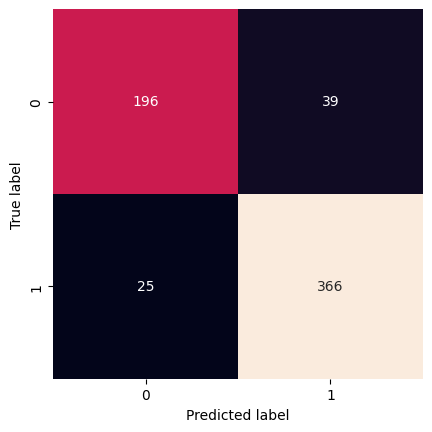

In [7]:
print(classification_report(actual_label, final_vgg_pred))
matrix=confusion_matrix(actual_label, final_vgg_pred)
sns.heatmap(matrix,square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       235
           1       0.92      0.87      0.89       391

    accuracy                           0.87       626
   macro avg       0.86      0.87      0.86       626
weighted avg       0.88      0.87      0.87       626



Text(113.9222222222222, 0.5, 'True label')

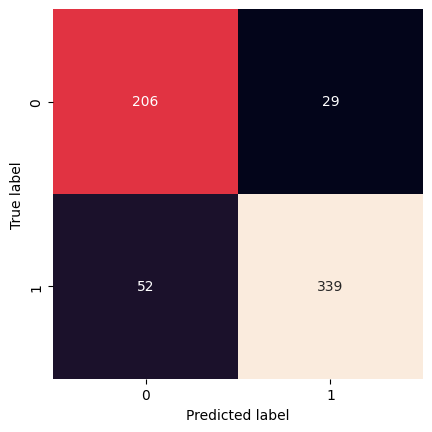

In [8]:
print(classification_report(actual_label, final_res_pred))
matrix=confusion_matrix(actual_label, final_res_pred)
sns.heatmap(matrix,square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       235
           1       0.89      0.94      0.91       391

    accuracy                           0.89       626
   macro avg       0.89      0.87      0.88       626
weighted avg       0.89      0.89      0.89       626



Text(113.9222222222222, 0.5, 'True label')

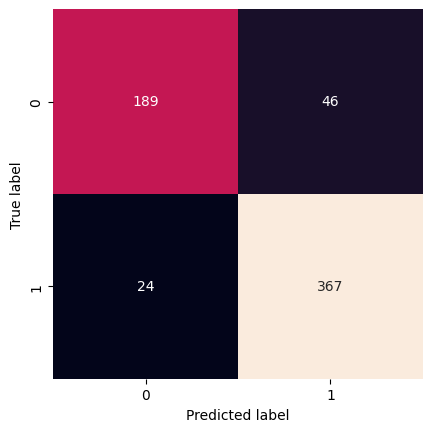

In [9]:
print(classification_report(actual_label, final_inc_pred))
matrix=confusion_matrix(actual_label, final_inc_pred)
sns.heatmap(matrix,square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')